<a href="https://colab.research.google.com/github/Alexanderjulz/DescriptiveStatisticsAndCorrelationTest/blob/main/CorrelationTestAndDescriptiveStatsGroupWork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#PACKAGE INSTALLATION
import pandas as pd
import pandas.util.testing as tm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
!pip install researchpy 
import researchpy as rp 
import scipy.stats as st
import pylab

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
#import csv file
df = pd.read_csv("/content/drive/MyDrive/rent_apartment_moscow.csv")
#remove columns
df = df.drop(['way'], axis=1)
df = df.drop(['storeys'], axis=1)
df = df.drop(['fee_percent'], axis=1)
df = df.drop(['living_area'], axis=1)
df = df.drop(['kitchen_area'], axis=1)
df = df.drop(['Unnamed: 0'], axis=1)
#remove (+) from rooms column and "no data" from metro column
df = df[df.metro != 'No data']
df = df[df.rooms != '+']
#remove outliers from storey column > 101 (see assumption)
df['storey'].values[df['storey'].values > 101] = 0
df = df[df.storey != 0]
#remove outliers from price column > 250,000 (see assumption in links below)
df['price'].values[df['price'].values > 250000] = 0
df = df[df.price != 0]
df['views'].values[df['views'].values > 1000] = 0
df = df[df.views != 0]
#convert rooms column from object to int
df['rooms']=df['rooms'].astype(int) 
print(df.dtypes)
df.head(9)
list(df)
df.shape
df.describe()

metro         object
price          int64
minutes        int64
provider      object
views          int64
storey         int64
rooms          int64
total_area     int64
dtype: object


,price,minutes,views,storey,rooms,total_area
count,2716.000000,2716.000000,2716.000000,2716.000000,2716.000000,2716.000000
mean,81540.464654,11.130339,33.313328,7.940722,1.837997,55.980118
std,58923.923048,6.123465,63.275167,6.706624,0.924143,26.421020
min,2700.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,44000.000000,7.000000,11.000000,3.000000,1.000000,40.000000
50%,60000.000000,11.000000,21.000000,6.000000,2.000000,58.000000
75%,100000.000000,14.000000,34.000000,10.000000,2.000000,64.000000
max,250000.000000,57.000000,971.000000,92.000000,8.000000,270.000000


Text(0.5, 1.0, 'Histogram of Price Distribution')

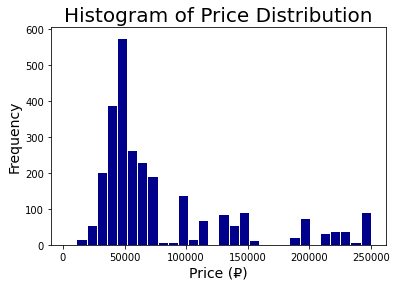

In [ ]:
#DATA VISUALIZATION
df['price'].plot.hist(bins = 30, edgecolor = 'white', color = "darkblue", linewidth = 1.0)
plt.ylabel('Frequency', fontsize = 14) # y-axis label
plt.xlabel('Price (₽)', fontsize = 14) # x-axis label
plt.title('Histogram of Price Distribution', fontsize = 20) # main title

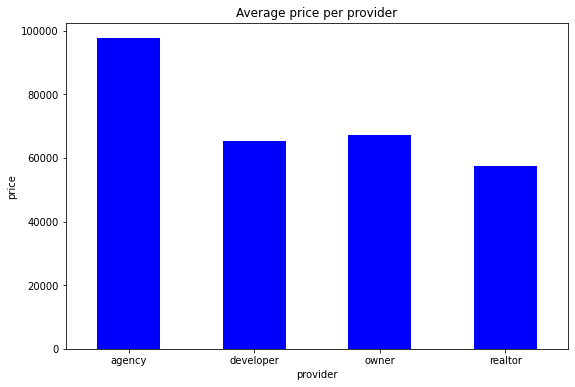

In [ ]:
df[['price', 'provider']].groupby(by = 'provider') .mean().round(decimals=1) .plot(
    kind='bar', figsize = (9,6), color = 'b', rot = 0, legend = None,
    xlabel ='provider', ylabel = 'price', title = 'Average price per provider')
plt.show()

Text(0.5, 1.0, 'Histogram of Minutes Distribution')

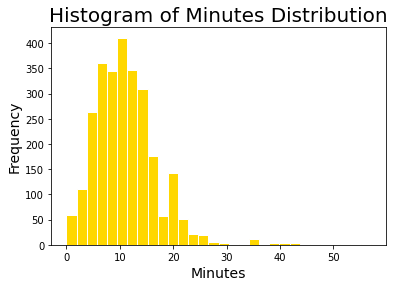

In [ ]:
df['minutes'].plot.hist(bins = 30, edgecolor = 'white', color = "gold", linewidth = 1.0)
plt.ylabel('Frequency', fontsize = 14) # y-axis label
plt.xlabel('Minutes', fontsize = 14) # x-axis label
plt.title('Histogram of Minutes Distribution', fontsize = 20) # main title

agency       1374
developer    1130
owner         160
realtor        52
Name: provider, dtype: int64


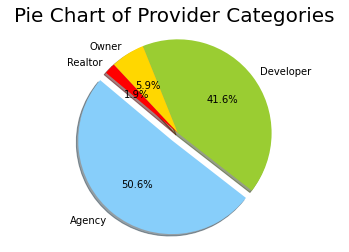

,metro,price,minutes,provider,views,storey,rooms,total_area
0,Baumanskaia,80000,13,agency,127,5,2,50
1,Kommunarka,27000,3,owner,23,12,1,38
2,Michurinskii prospekt,150000,5,realtor,56,17,4,130
3,Khovrino,47000,10,realtor,748,6,2,55
4,Planernaia,39000,10,realtor,835,8,1,33
...,...,...,...,...,...,...,...,...
4017,Sokol,60000,17,developer,19,13,2,56
4019,Planernaia,50000,21,owner,44,3,1,42
4020,Preobrazhenskaia ploshchad,45000,14,developer,11,5,1,30
4187,Alekseevskaia,47000,18,owner,4,4,1,3


In [ ]:
df1 = df.provider.value_counts()
print(df1)
labels = 'Agency', 'Developer', 'Owner', 'Realtor'
df1 = df.provider.value_counts()
colors = ['lightskyblue', 'yellowgreen', 'gold', 'red']
explode = (0.1, 0, 0, 0)  # explode 1st slice

# Plot
plt.pie(df1, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Pie Chart of Provider Categories', fontsize = 20) # main title
plt.axis('equal')
plt.show()
df

In [ ]:
df['metro_count']=df['metro']

                        metro_count
metro                              
 Buninskaia Alleia               73
 Rasskazovka                     54
 Salarevo                        52
 Nekrasovka                      51
 Filatov Lug                     47
 Mezhdunarodnaia                 38
 Bratislavskaia                  37
 Babushkinskaia                  36
 Bulvar Rokossovskogo            34
 Smolenskaia                     34
 Maiakovskaia                    34
 Okskaia                         32
 Seligerskaia                    31
 Novogireevo                     31
 Ulitca Skobelevskaia            31
 Narodnoe Opolchenie             31
 Medvedkovo                      30
 Barrikadnaia                    29
 Fili                            29
 Oktiabrskoe pole                28


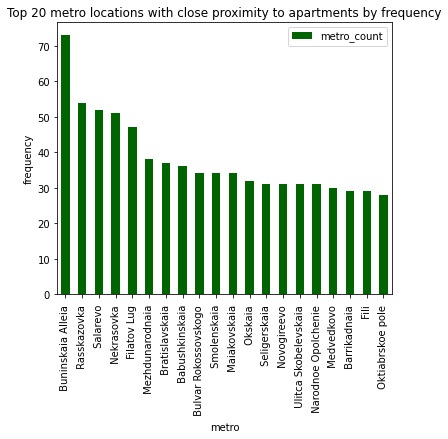

In [ ]:
#barplot
from pandas import DataFrame
metro_frequency = df.groupby("metro")["metro_count"].count()
metro_frequency.head(10)
df3 = DataFrame(metro_frequency).sort_values(['metro_count'], ascending=[False])
Top20 = df3.head(20)
print(Top20)
Top20.plot(kind='bar', title='Top 20 metro locations with close proximity to apartments by frequency', ylabel='frequency', xlabel='metro', 
           figsize=(6, 5),color=['darkgreen'] )

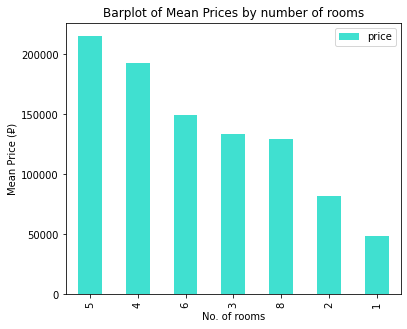

In [ ]:
#barplot
mean_price_by_rooms= df.groupby("rooms")["price"].mean()
mean_price_by_rooms.head(10)
df4 = DataFrame(mean_price_by_rooms).sort_values(['price'], ascending=[False])
df4.head()

df4.plot(kind='bar', title='Barplot of Mean Prices by number of rooms', ylabel='Mean Price (₽)', xlabel='No. of rooms', 
           figsize=(6, 5),color=['turquoise'] )

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Price v. Minutes')

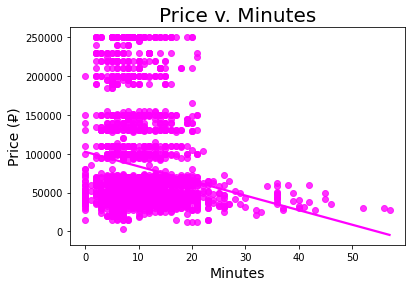

In [ ]:
#CORRELATION TEST BETWEEN PRICE AND MINUTES
#weak negative correlation, falls from left to right
sns.regplot(df['minutes'], df['price'], color= 'magenta', ci = None) 
 
plt.ylabel('Price (₽)', fontsize = 14) 
plt.xlabel('Minutes', fontsize = 14) 
plt.title('Price v. Minutes', fontsize = 20) 


In [ ]:
from scipy.stats.stats import pearsonr
r, p = pearsonr(df['minutes'], df['price'])

print("r =", round(r, 3))
if p < .001:
 print("p <.001")
elif p <.01:
 print("p <.01")
elif p <.05:
 print("p <.05")
else:
 print("Not significant")

r = -0.195
p <.001


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Price v. storey')

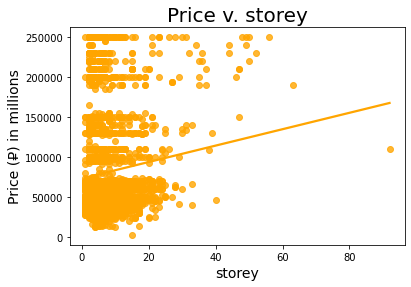

In [ ]:
#CORRELATION BETWEEN STOREY AND PRICE
#weak positive correlation, rises from left to right
sns.regplot(df['storey'], df['price'], color= 'orange', ci = None) 
 
plt.ylabel('Price (₽) in millions', fontsize = 14) 
plt.xlabel('storey', fontsize = 14) 
plt.title('Price v. storey', fontsize = 20) 

In [ ]:
from scipy.stats.stats import pearsonr
r, p = pearsonr(df['storey'], df['price'])

print("r =", round(r, 3))
if p < .001:
 print("p <.001")
elif p <.01:
 print("p <.01")
elif p <.05:
 print("p <.05")
else:
 print("Not significant")

r = 0.117
p <.001


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Price v. views')

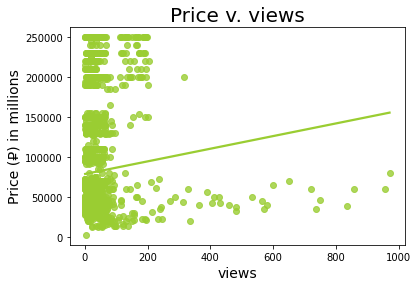

In [ ]:
#CORRELATION BETWEEN VIEWS AND PRICE
#weak positive correlation, rises from left to right
sns.regplot(df['views'], df['price'], color= 'yellowgreen', ci = None) 
 
plt.ylabel('Price (₽) in millions', fontsize = 14) 
plt.xlabel('views', fontsize = 14) 
plt.title('Price v. views', fontsize = 20) 

In [ ]:
from scipy.stats.stats import pearsonr
r, p = pearsonr(df['views'], df['price'])

print("r =", round(r, 3))
if p < .001:
 print("p <.001")
elif p <.01:
 print("p <.01")
elif p <.05:
 print("p <.05")
else:
 print("Not significant")

r = 0.085
p <.001


The code above is used to find the correlation coefficient and P value for Views Vs Price

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Price v. Total area')

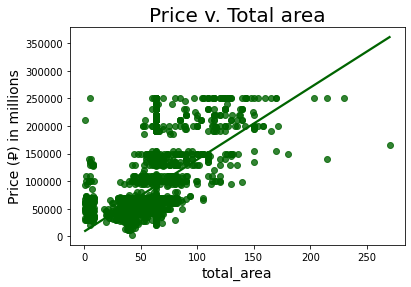

In [ ]:
#CORRELATION BETWEEN TOTAL AREA AND PRICE
#medium positive correlation, rises from left to right
sns.regplot(df['total_area'], df['price'], color= 'darkgreen', ci = None) 
 
plt.ylabel('Price (₽) in millions', fontsize = 14) 
plt.xlabel('total_area', fontsize = 14) 
plt.title('Price v. Total area', fontsize = 20) 

In [ ]:
from scipy.stats.stats import pearsonr
r, p = pearsonr(df['total_area'], df['price'])

print("r =", round(r, 3))
if p < .001:
 print("p <.001")
elif p <.01:
 print("p <.01")
elif p <.05:
 print("p <.05")
else:
 print("Not significant")

r = 0.586
p <.001


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Price v. rooms')

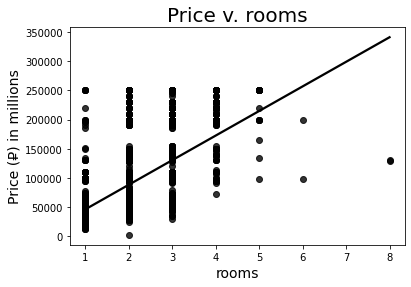

In [ ]:
#CORRELATION BETWEEN ROOM AND NUMBER
#strong positive correlation, rises from left to right
sns.regplot(df['rooms'], df['price'], color= 'black', ci = None) 
 
plt.ylabel('Price (₽) in millions', fontsize = 14) 
plt.xlabel('rooms', fontsize = 14) 
plt.title('Price v. rooms', fontsize = 20) 

In [ ]:
from scipy.stats.stats import pearsonr
r, p = pearsonr(df['rooms'], df['price'])

print("r =", round(r, 3))
if p < .001:
 print("p <.001")
elif p <.01:
 print("p <.01")
elif p <.05:
 print("p <.05")
else:
 print("Not significant")

r = 0.66
p <.001
